# News Mood

In [1]:
#import dependencies
import os
import tweepy
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import time

#Twitter API Keys
consumer_key = os.environ['consumer_key']
consumer_secret = os.environ['consumer_secret']
access_token = os.environ['access_token']
access_token_secret = os.environ['access_token_secret']

#Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
#Target Search for BBC, CBS, CNN, Fox, and New York Times
target_terms = ("@BBC", "@CBSNews", "@CNN", "@FoxNews", "@NYTimes")

#creating empty lists
sentiment_array = []
oldest_tweet = None
target_list = []
user_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
date_list = []
text_list = []
counter_list = []

#vader sentiments and dataframe
for target in target_terms:
    
    counter = 0

    for x in range (3):
        
        public_tweets = api.search(target, count=50, result_type="recent", max_id=oldest_tweet)
        
        for tweet in public_tweets["statuses"]:
            counter = counter + 1
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            target_list.append(target)
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            user_list.append(tweet["user"]["name"])
            date_list.append(tweet["created_at"])
            text_list.append(tweet["text"])
            counter_list.append(counter)
                        
        sentiment_array = pd.DataFrame({
            "News Outlet": target_list,
            "User": user_list,
            "Date": date_list,
            "Tweet": text_list,
            "Compound": compound_list,
            "Positive": positive_list,
            "Neutral": negative_list,
            "Negative": neutral_list,
            "Tweet Ago": counter_list
            })


In [3]:
#restructure data frame
sentiment_csv=sentiment_array[['News Outlet', 'User','Date', 'Tweet', 'Compound','Positive','Neutral','Negative', 'Tweet Ago']]
sentiment_csv.head()

,News Outlet,User,Date,Tweet,Compound,Positive,Neutral,Negative,Tweet Ago
0,@BBC,Nnaoma 🇳🇬,Sat Mar 10 22:40:28 +0000 2018,RT @ronanmcmanus: @BBC https://t.co/81uBA7v4TF,0.0000,0.000,0.0,1.000,1
1,@BBC,Lluís Mundet 🎗🇧🇪🇨🇭,Sat Mar 10 22:40:26 +0000 2018,RT @BBC: 🙌 1 year ago today the world became a...,0.4404,0.209,0.0,0.791,2
2,@BBC,Roberto Encinas,Sat Mar 10 22:40:26 +0000 2018,RT @BBC: 🙌 1 year ago today the world became a...,0.4404,0.209,0.0,0.791,3
3,@BBC,Bill Glick,Sat Mar 10 22:40:25 +0000 2018,RT @BBC: 🙌 1 year ago today the world became a...,0.4404,0.209,0.0,0.791,4
4,@BBC,Richard de Give,Sat Mar 10 22:40:24 +0000 2018,RT @BBC: 🙌 1 year ago today the world became a...,0.4404,0.209,0.0,0.791,5


In [4]:
#export to csv
sentiment_csv.to_csv("News_Mood.csv")

In [10]:
#dictionary for news outlets and chart colors
news_labels = {'BBC': 
                   {'name': 'BBC', 
                    'color': 'blue'},
               'CBSNews': 
                   {'name': 'CBS', 
                    'color': 'lightblue'},
               'CNN': 
                   {'name': 'CNN', 
                    'color': 'red'}, 
                'FoxNews': 
                   {'name': 'Fox', 
                    'color': 'yellow'},
               'NYTimes': 
                   {'name': 'New York Times', 
                    'color': 'green'}}

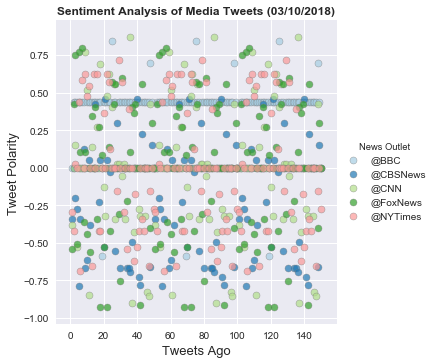

In [11]:
sns.lmplot(x="Tweet Ago", y="Compound", data=sentiment_array, 
           fit_reg=False, hue="News Outlet", palette="Paired",
           legend=True,
           scatter_kws={
               "edgecolor":"grey",
               "linewidth":0.5,
               "alpha":0.7
           })

plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.ylabel("Tweet Polarity", size=13)
plt.xlabel("Tweets Ago", size=13)

plt.savefig("sentimentfig") 

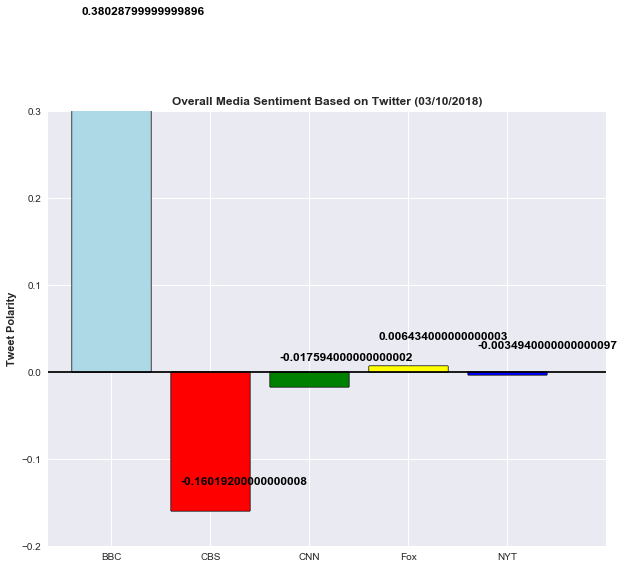

In [12]:
#bar graph
scoresbyoutlet=sentiment_csv.groupby("News Outlet")["Compound"].mean()
x_axis=np.arange(len(scoresbyoutlet))

sns.set()

plt.figure(figsize = (10,8))
for newsoutlet in news_labels.keys():
    df = sentiment_csv[sentiment_csv['News Outlet'] == newsoutlet]
    overall_media_sentiment = plt.bar(x_axis,scoresbyoutlet, color = {"lightblue","green", "yellow", "red", "blue"}, label = newsoutlet, edgecolor = "black")
plt.ylim(-.2, .3)
plt.ylabel("Tweet Polarity",fontweight='bold')
plt.axhline(y=0, color = 'black')
for i, v in enumerate(scoresbyoutlet):
    plt.text(i-.3, v+.03, str(v).format(), color='black', fontweight='bold')
plt.title("Overall Media Sentiment Based on Twitter (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
x_labels = ["BBC", "CBS", "CNN", "Fox", "NYT"]
x_locations = [value for value in np.arange(6)]
plt.xticks(x_locations, x_labels)
plt.show()
plt.savefig('Overall Media Sentiment Based on Twitter.png')

### Observations

* CBS has the most negative tweets in the group of news networks

* BBC has the most positive tweets in the group of news networks

* CNN, Fox and NYT appear to post the most neutral tweets in group of news networks